<a href="https://colab.research.google.com/github/IgorMatias04/AulaIA-05/blob/main/ExercicioIA_B1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

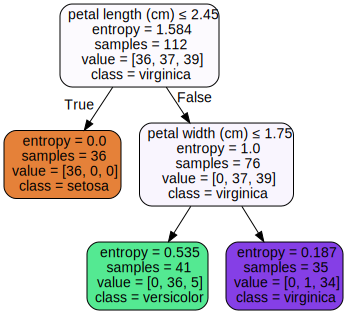

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
print(iris['DESCR'])

from sklearn.model_selection import train_test_split
#ALTERAÇÃO COM O TEST_SIZE
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

import pandas as pd

print("\nMatriz de confusão detalhada:\n",
      pd.crosstab(y_test, predictions, rownames=['Real'], colnames=
 ['Predito'],
        margins=True, margins_name='Todos'))

import sklearn.metrics as metrics

print("Relatório sobre a qualidade:\n")

print(metrics.classification_report(y_test, predictions, target_names=['Setosa', 'Versicolor', 'Virgínica']))

import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")
dot_data = tree.export_graphviz(clf, out_file=None,
                              feature_names=iris.feature_names,
                              class_names=iris.target_names,
                              filled=True, rounded=True,
                              special_characters=True)
graph = graphviz.Source(dot_data, format="png")
graph